<a href="https://colab.research.google.com/github/nhattan206/AI_project/blob/main/Tien(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
def create_img_dataset(raw_folder,dataset_name):

    target_size = (150, 150)
    pictures = []
    labels = []

    for folder in listdir(raw_folder):
      print("Folder=",folder)
      for file in listdir(raw_folder + "/" + folder):
        print("File=", file)
        pictures.append(cv2.resize(cv2.imread(raw_folder + "/" + folder + "/" + file)
                                              ,dsize = target_size))
        labels.append(folder)

    pictures = np.array(pictures)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)

    with open (dataset_name, mode = 'wb') as file:
    # dump information to that file
      pickle.dump((pictures,labels), file)

    file.close()

def load_data(dataset_path):

    file = open(dataset_path, mode = 'rb')
    # dump information to that file
    (pictures, labels) = pickle.load (file)
    file.close()

    return pictures, labels

raw_folder = "/content/drive/MyDrive/money"

create_img_dataset(raw_folder= raw_folder,dataset_name= 'money.txt')
dataset_path = "money.txt"
x_data,y_data = load_data(dataset_path= 'money.txt')

x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, random_state=100)
x_test_1 = x_test


Folder= 050000
File= 50000_02.jpg
File= 50000_00.jpg
File= 50000_01.jpg
File= 50000_05.jpg
File= 50000_03.jpg
File= 50000_04.jpg
File= 50000_06.jpg
File= 50000_07.jpg
File= 50000_09.jpg
File= 50000_08.jpg
File= 50000_10.jpg
File= 50000_14.jpg
File= 50000_11.jpg
File= 50000_13.jpg
File= 50000_12.jpg
File= 50000_16.jpg
File= 50000_15.jpg
File= 50000_17.jpg
File= 50000_19.jpg
File= 50000_20.jpg
File= 50000_18.jpg
File= 50000_21.jpg
File= 50000_24.jpg
File= 50000_22.jpg
File= 50000_25.jpg
File= 50000_23.jpg
File= 50000_28.jpg
File= 50000_27.jpg
File= 50000_29.jpg
File= 50000_26.jpg
File= 50000_30.jpg
File= 50000_32.jpg
File= 50000_31.jpg
File= 50000_33.jpg
File= 50000_34.jpg
File= 50000_36.jpg
File= 50000_35.jpg
File= 50000_40.jpg
File= 50000_38.jpg
File= 50000_39.jpg
File= 50000_37.jpg
File= 50000_43.jpg
File= 50000_41.jpg
File= 50000_42.jpg
File= 50000_44.jpg
File= 50000_48.jpg
File= 50000_45.jpg
File= 50000_46.jpg
File= 50000_47.jpg
File= 50000_50.jpg
File= 50000_51.jpg
File= 50000_52.j

In [29]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
from os import listdir
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [31]:
x_label = [' 1 ngàn',' 2 ngàn','5 ngàn','10 ngàn',
           '20 ngàn', '50 ngàn','100 ngàn','200 ngàn','500 ngàn']

In [32]:
#Tạo mô hình CNN
model=Sequential()
#Block 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
#Block 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
#Block 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
#Tạo ANN
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [33]:
#Bien Dich
opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test),verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
10/10 [==============================] - 3s 286ms/step - loss: 4.0280 - accuracy: 0.1143 - val_loss: 2.1562 - val_accuracy: 0.2701
Epoch 2/100
10/10 [==============================] - 3s 258ms/step - loss: 2.0945 - accuracy: 0.2568 - val_loss: 1.8779 - val_accuracy: 0.2733
Epoch 3/100
10/10 [==============================] - 3s 260ms/step - loss: 1.7243 - accuracy: 0.3623 - val_loss: 1.7650 - val_accuracy: 0.2412
Epoch 4/100
10/10 [==============================] - 3s 260ms/step - loss: 1.4842 - accuracy: 0.4251 - val_loss: 1.2292 - val_accuracy: 0.5531
Epoch 5/100
10/10 [==============================] - 3s 261ms/step - loss: 1.1370 - accuracy: 0.6192 - val_loss: 0.8050 - val_accuracy: 0.7203
Epoch 6/100
10/10 [==============================] - 3s 261ms/step - loss: 0.5882 - accuracy: 0.8035 - val_loss: 0.4281 - val_accuracy: 0.8360
Epoch 7/100
10/10 [==============================] - 3s 262ms/step - loss: 0.6859 - accuracy: 0.7504 - val_loss: 0.9880 - val_accuracy: 0.6463

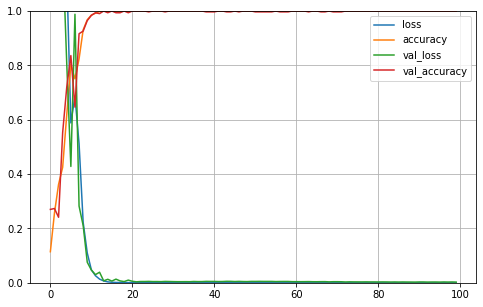

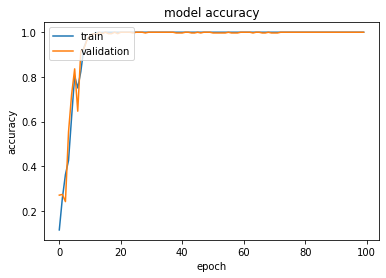

In [34]:
#Ve do thi
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

Hinh so  118
predictions: [6]
Menh gia: 100 ngàn


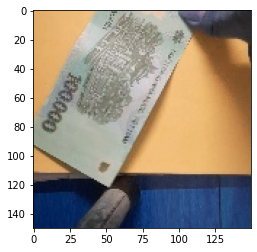

In [40]:
i = randint(0,len(y_test)-1)
sample = np.array([x_test[i]])
predictions = np.argmax(model.predict(sample), axis=-1)
print ('Hinh so ',i)
print("predictions:", predictions)
print("Menh gia:", x_label[int(predictions)])
plt.imshow(x_test_1[i])